<a href="https://colab.research.google.com/github/JustAlex5/deep_learning/blob/main/ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Ex.4 - Training Networks

Submitted by: [**Alex Kovalyov**]


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.layers import Input, Dropout, BatchNormalization  # <-- new layers!
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation # <-- new layers!

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from seaborn import heatmap 

print(tf.__version__)

2.7.0


### Load the CIFAR-10 Dataset

We will use the same CIFAR-10 dataset as in Ex.3:

In [2]:
# 1. load/download the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
train_labels = train_labels.flatten()  # (50000, 1) -> (50000,)
test_labels = test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 4. define the 10 classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('train_images.shape =',train_images.shape)
print('train_labels.shape =',train_labels.shape)
print('test_images.shape =',test_images.shape)
print('test_labels.shape =',test_labels.shape)


170508288/170498071 [==============================] - 11s 0us/step
train_images.shape = (50000, 32, 32, 3)
train_labels.shape = (50000,)
test_images.shape = (10000, 32, 32, 3)
test_labels.shape = (10000,)


***

## 1. Testing SGD options

Our basic model will be the same as in Ex.3:

- `Input` layer
- 32 3x3-`Conv2D` + 2x2 `MaxPooling` 
- 64 3x3-`Conv2D` + 2x2 `MaxPooling` 
- 128 3x3-`Conv2D` + 2x2 `MaxPooling` 
- 128-`Dense` 
- 10-`Dense` - output layer 


Prepeare a function that returns this model (without the `compile` part, just the layers)



In [3]:
def make_basic_model():
    # build out basic model
    the_model = Sequential()
    the_model.add(Input(shape=(32,32,3)))
    the_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    the_model.add(MaxPooling2D((2,2)))
    the_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    the_model.add(MaxPooling2D((2,2)))
    the_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    the_model.add(MaxPooling2D((2,2)))
    the_model.add(Flatten())
    the_model.add(Dense(128, activation='relu'))
    the_model.add(Dense(10, activation='softmax'))
    return the_model


We will train the same model, each time using a different optimizer:
- SGD with `learning_rate = 0.01`  (the default value)
- SGD with `learning_rate = 0.001` 
- SGD with `learning_rate = 0.1`
- SGD with `learning_rate = 0.01` and `momentum = 0.9`


In order to train each model from scratch (and not to continue training the same model again and again), create a new model each time (m1, m2, m3, m4).

Also, use a **different variable** to record the `history` of the training results (h1, h2, h3, h4).

Train each model for 100 epochs with a batch size of 64 (remember to use a GPU), and plot the usual graphs (loss&accuracy for train&test).



####  SGD with learning_rate = 0.01


In [4]:
        ################################
        ###  your code goes here...  ###
        ################################

model=make_basic_model()
opt=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,  loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history1 = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels))  



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

#### SGD with learning_rate = 0.001 



In [5]:
        ################################
        ###  your code goes here...  ###
        ################################

model=make_basic_model()
opt=tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,  loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history2 = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels))  


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

#### SGD with learning_rate = 0.1 


In [6]:
        ################################
        ###  your code goes here...  ###
        ################################

model=make_basic_model()
opt=tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt,  loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history3 = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels))  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

#### SGD with learning_rate = 0.01 and momentum = 0.9


In [7]:
        ################################
        ###  your code goes here...  ###
        ################################
model=make_basic_model()
opt=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,  loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history4 = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels)) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 128)       

#### Graphical comparison 

Finally, In a single graph, plot together the training loss curves of all 4 runs (use different color for each plot, and add a proper legend).


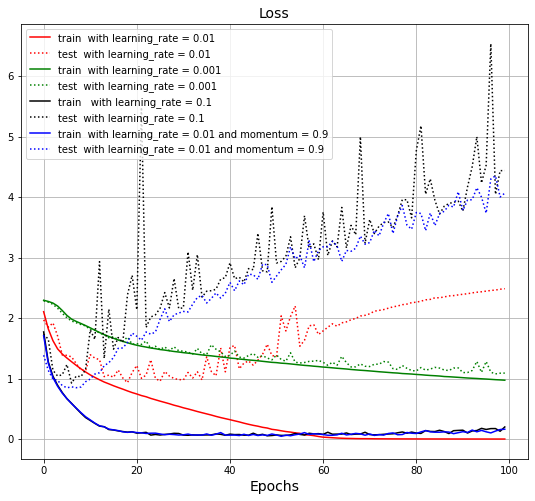

In [23]:
        ################################
        ###  your code goes here...  ###
        ################################

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(history1.history['loss'],'r', label='train  with learning_rate = 0.01')
plt.plot(history1.history['val_loss'],':r', label='test  with learning_rate = 0.01')

plt.plot(history2.history['loss'],'g', label='train  with learning_rate = 0.001 ')
plt.plot(history2.history['val_loss'],':g', label='test  with learning_rate = 0.001')

plt.plot(history3.history['loss'],'k', label='train   with learning_rate = 0.1')
plt.plot(history3.history['val_loss'],':k', label='test  with learning_rate = 0.1')

plt.plot(history4.history['loss'],'b', label='train  with learning_rate = 0.01 and momentum = 0.9')
plt.plot(history4.history['val_loss'],':b', label='test  with learning_rate = 0.01 and momentum = 0.9')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()



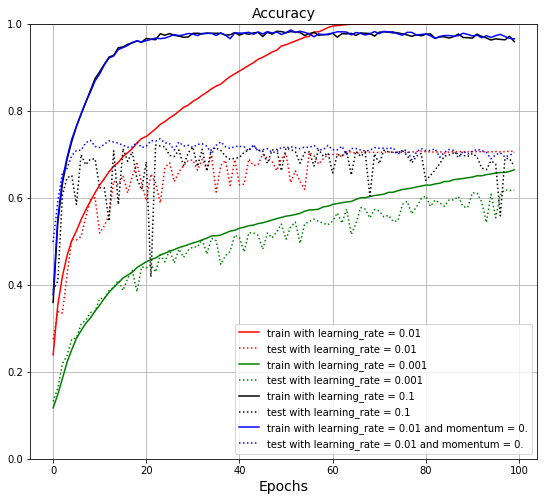

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'],'r', label='train with learning_rate = 0.01')
plt.plot(history1.history['val_accuracy'],':r', label='test with learning_rate = 0.01')

plt.plot(history2.history['accuracy'],'g', label='train with learning_rate = 0.001 ')
plt.plot(history2.history['val_accuracy'],':g', label='test with learning_rate = 0.001')

plt.plot(history3.history['accuracy'],'k', label='train with learning_rate = 0.1')
plt.plot(history3.history['val_accuracy'],':k', label='test with learning_rate = 0.1')

plt.plot(history4.history['accuracy'],'b', label='train with learning_rate = 0.01 and momentum = 0.')
plt.plot(history4.history['val_accuracy'],':b', label='test with learning_rate = 0.01 and momentum = 0.')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()

---
## 2. Add Dropout

In order to overcome the over-training we will add `dropout` layers: one `dropout` layer before each of the `Dense` layers. Use a 20% dropout rate.

Pick your favorite SGD optimizer and train the network for 50 Epochs. 

- Verify that you get better results in terms of over-training (less over-training is better..)

- Did you also get a better accuracy on the validation data?

In [9]:
        ################################
        ###  your code goes here...  ###
        ################################
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,  loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels)) 



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

train acc: 0.8087599873542786
test acc: 0.741100013256073


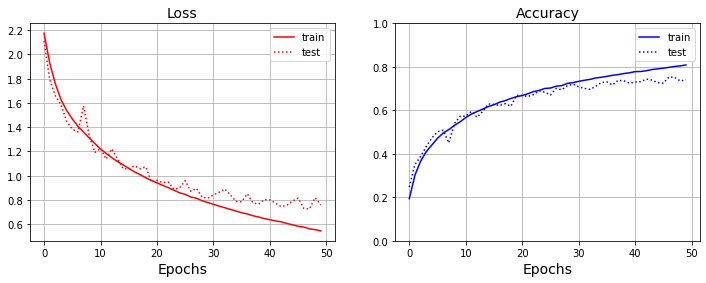

In [10]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],':r', label='test')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b', label='train')
plt.plot(history.history['val_accuracy'],':b', label='test')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()
print( "train acc:", history.history['accuracy'][-1])
print( "test acc:", history.history['val_accuracy'][-1])

---
## 3. Add Data Augmentation

Add 2-3 layers of data augmentation (of your choice) to the previous model (with the dropout).

- Train the model (50 epoch)

- Did you get better results?


In [17]:
        ################################
        ###  your code goes here...  ###
        ################################



model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(RandomFlip("horizontal"))
model.add(RandomTranslation(0.1,0.1))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,  loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels)) 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_translation_3 (Rando  (None, 32, 32, 3)        0         
 mTranslation)                                                   
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 64)        

train acc: 0.6757000088691711
test acc: 0.7139000296592712


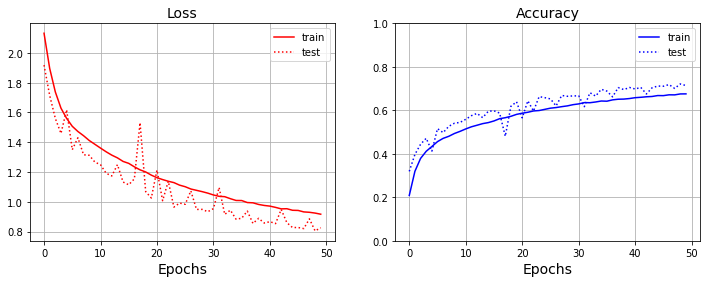

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],':r', label='test')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b', label='train')
plt.plot(history.history['val_accuracy'],':b', label='test')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()
print( "train acc:", history.history['accuracy'][-1])
print( "test acc:", history.history['val_accuracy'][-1])

---
## 4. Deeper model

Finally, lets make the model a bit deeper, doubling each `Conv2D` layer.
We will also add `BatchNormalization` layers in between, to help the learning converge faster

- 32 3x3-`Conv2D` + BatchNormalization()` + 32 3x3-`Conv2D` + BatchNormalization()` + 2x2 `MaxPooling` 
- 64 3x3-`Conv2D` + BatchNormalization()` + 64 3x3-`Conv2D` + BatchNormalization()` + 2x2 `MaxPooling` 
- 128 3x3-`Conv2D` + BatchNormalization()` + 128 3x3-`Conv2D` + BatchNormalization()` + 2x2 `MaxPooling` 

Train this model (including the data augmentation and drop-out) and plot the usual graphs.

(Hopefully, you should get close to 90% accuracy..)

In [13]:
        ################################
        ###  your code goes here...  ###
        ################################
model = Sequential()
model.add(Input(shape=(32,32,3)))

#preprocessing
model.add(RandomFlip("horizontal"))
model.add(RandomTranslation(0.1,0.1))


model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

history = model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0, validation_data=(test_images,test_labels ))




train acc: 0.9432799816131592
test acc: 0.8847000002861023


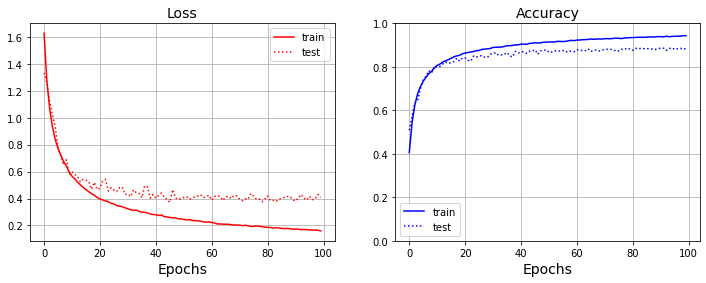

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],':r', label='test')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b', label='train')
plt.plot(history.history['val_accuracy'],':b', label='test')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend()
plt.grid()
print( "train acc:", history.history['accuracy'][-1])
print( "test acc:", history.history['val_accuracy'][-1])

***
## Good Luck!